In [156]:
import numpy as np 
import pandas as pd 
import os
import librosa
import soundfile as sf
import sklearn
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as  plt
from sklearn.metrics import accuracy_score

In [124]:
path_train = []
for dirname, _, filenames in os.walk("C:/Users/Ali Raza/OneDrive/Desktop/SERDataset/Train"):
    for filename in filenames:
        path_train.append(os.path.join(dirname,filename))
                          
len(path_train)

385

In [125]:
path_test = []
for dirname, _, filenames in os.walk("C:/Users/Ali Raza/OneDrive/Desktop/SERDataset/Test"):
    for filename in filenames:
        path_test.append(os.path.join(dirname,filename))
                          
len(path_test)    

60

In [126]:
data_train = []
sr_train = []
data_test = []
sr_test = []


for i in range(len(path_train)):
    data,sr= sf.read(path_train[i])
    data_train.append(data)
    sr_train.append(sr)

for i in range(len(path_test)):
    data,sr= sf.read(path_test[i])
    data_test.append(data)
    sr_test.append(sr)


In [127]:
mfcc_train = []
mfcc_test = []
for i in range(len(data_train)):
    mfcc_train.append(np.mean(librosa.feature.mfcc(y=data_train[i], sr=sr_train[i], n_mfcc=47), axis=1))
mfcc_train = np.array(mfcc_train)
mfcc_train.shape

for i in range(len(data_test)):
    mfcc_test.append(np.mean(librosa.feature.mfcc(y=data_test[i], sr=sr_test[i], n_mfcc=47), axis=1))

mfcc_test = np.array(mfcc_test)
mfcc_test.shape

(60, 47)

In [128]:
chroma_train = []
chroma_test = []

for i in range(len(data_train)):
    chroma_train.append(np.mean(librosa.feature.chroma_stft(data_train[i], sr_train[i]),axis=1))
chroma_train = np.array(chroma_train)
chroma_train.shape

for i in range(len(data_test)):
    chroma_test.append(np.mean(librosa.feature.chroma_stft(data_test[i], sr_test[i]),axis=1))
chroma_test = np.array(chroma_test)
chroma_test.shape

(60, 12)

In [129]:
mel_train = []
mel_test = []

for i in range(len(data_train)):
    mel_train.append(np.mean(librosa.feature.melspectrogram(data_train[i],  sr_train[i]), axis = 1))
mel_train = np.array(mel_train)


for i in range(len(data_test)):
    mel_test.append(np.mean(librosa.feature.melspectrogram(data_test[i],  sr_test[i]), axis = 1))
mel_test = np.array(mel_test)
mel_test.shape
mel_train.shape

(385, 128)

In [130]:
contrast_train = []
contrast_test = []

for i in range(len(data_train)):
    contrast_train.append(np.mean(librosa.feature.spectral_contrast(data_train[i],  sr_train[i]), axis = 1))
contrast_train = np.array(contrast_train)

for i in range(len(data_test)):
    contrast_test.append(np.mean(librosa.feature.spectral_contrast(data_test[i],  sr_test[i]), axis = 1))
contrast_test = np.array(contrast_test)
contrast_test.shape
contrast_train.shape

(385, 7)

In [131]:
tonnetz_train = []
tonnetz_test = []

for i in range(len(data_train)):
    tonnetz_train.append(np.mean(librosa.feature.tonnetz(data_train[i], sr_train[i]), axis = 1))
tonnetz_train = np.array(tonnetz_train)

for i in range(len(data_test)):
    tonnetz_test.append(np.mean(librosa.feature.tonnetz(data_test[i], sr_test[i]), axis = 1))
tonnetz_test = np.array(tonnetz_test)

tonnetz_train.shape

C:\Users\Ali Raza\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=690
  warnings.warn(
C:\Users\Ali Raza\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=684
  warnings.warn(
C:\Users\Ali Raza\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=1024 is too small for input signal of length=342
  warnings.warn(


(385, 6)

In [132]:
x_test = []
x_train =[]

for i in range(len(data_train)):
    x_train.append(np.hstack((mfcc_train[i], chroma_train[i], mel_train[i], contrast_train[i], tonnetz_train[i])))
x_train = np.array(x_train)


for i in range(len(data_test)):
    x_test.append(np.hstack((mfcc_test[i], chroma_test[i], mel_test[i], contrast_test[i], tonnetz_test[i])))
x_test = np.array(x_test)

x_train.shape
x_test.shape

(60, 200)

In [133]:
y_train = []
y_test = []

for i in range(len(path_train)):
    if('Angry' in path_train[i]):
        y_train.append('Angry')
    elif('Happy' in path_train[i]):
        y_train.append('Happy')
    elif('Sad' in path_train[i]):
        y_train.append('Sad')
    elif('Neutral' in path_train[i]):
        y_train.append('Neutral')
        
for i in range(len(path_test)):
    if('Angry' in path_test[i]):
        y_test.append('Angry')
    elif('Happy' in path_test[i]):
        y_test.append('Happy')
    elif('Sad' in path_test[i]):
        y_test.append('Sad')
    elif('Neural' in path_test[i]):
        y_test.append('Neutral')
        
len(y_train)
len(y_test)

60

In [134]:
le = sklearn.preprocessing.LabelEncoder()
le.fit(y_train)
encoded_Train = le.transform(y_train)
encoded_Test = le.transform(y_test)


model = SVC(kernel='linear', C=1E10)
model.fit(x_train, encoded_Train) 
prediction = model.predict(x_test)
print (prediction)

x_train.shape

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


(385, 200)

In [135]:
accuracy_score(encoded_Test, prediction)

1.0

Text(0, 0.5, 'second half')

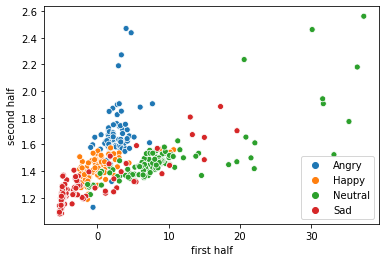

In [161]:
x_train = pd.DataFrame(x_train)
f_half = []
s_half = []

half = x_train.shape[1]//2
f_half = x_train.iloc[:,:half]
f_half = f_half[:].mean(axis=1)

s_half = x_train.iloc[:,half:]
s_half = s_half[:].mean(axis=1)

sns.scatterplot(f_half, s_half, y_train)
plt.xlabel('first half')
plt.ylabel('second half')

In [155]:
S1 = 'C:/Users/Ali Raza/OneDrive/Desktop/SERDataset/Test/Sad/SM25_F34_S084.wav'
mf = []
ch = []
m = []
c = []
t = []
test = np.array([])
predict = []

data,sr= sf.read(S1)
mf = np.mean(librosa.feature.mfcc(data, sr, n_mfcc=47), axis=1)
ch = np.mean(librosa.feature.chroma_stft(data, sr),axis=1)
m = np.mean(librosa.feature.melspectrogram(data,  sr), axis = 1)
c = np.mean(librosa.feature.spectral_contrast(data,  sr), axis = 1)
t = np.mean(librosa.feature.tonnetz(data, sr), axis = 1)
test = np.hstack((mf, ch, m, c, t))
A = model.predict(test.reshape(1,-1))

for i in range(len(y_test)):
    if A[0] == encoded_Test[i]:
        print(y_test[i])
        break


Sad
